In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [6]:
def generate_params(year):
    start_date = f'01/01/{year} 00:00:00'
    end_date = f'12/31/{year} 23:59:00'

    gmt = pytz.timezone('GMT')  # Use GMT timezone
    start_datetime = gmt.localize(datetime.datetime.strptime(start_date, '%m/%d/%Y %H:%M:%S'))
    end_datetime = gmt.localize(datetime.datetime.strptime(end_date, '%m/%d/%Y %H:%M:%S'))

    s_time_id = int(start_datetime.timestamp())
    e_time_id = int(end_datetime.timestamp())

    params = {
        'report_form': '1',
        'dnode': 'District',
        'content': 'loops',
        'tab': 'det_district_summary',
        'export': 'xls',
        'district_id': '12',
        's_time_id': str(s_time_id),
        's_time_id_f': start_datetime.strftime('%m/%d/%Y'),
        'e_time_id': str(e_time_id),
        'e_time_id_f': end_datetime.strftime('%m/%d/%Y'),
        'tod': 'all',
        'tod_from': '0',
        'tod_to': '0',
        'dow_0': 'on',
        'dow_1': 'on',
        'dow_2': 'on',
        'dow_3': 'on',
        'dow_4': 'on',
        'dow_5': 'on',
        'dow_6': 'on',
        'holidays': 'on',
        'q': 'vmt',
    }

    return params

In [7]:
import requests

cookies = {
    'nmstat': '427c4c1c-3146-c5f9-1ad3-3d495785a86b',
    '_ga': 'GA1.1.1813768829.1706303996',
    '__utmz': '267661199.1706304002.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none)',
    '_ga_WLDEF7NZZ2': 'GS1.1.1706336436.2.0.1706336436.0.0.0',
    '_ga_69TD0KNT0F': 'GS1.1.1706336436.2.0.1706336436.0.0.0',
    '_ga_PXR8P55JR4': 'GS1.1.1706336436.2.0.1706336436.0.0.0',
    'PHPSESSID': '5eebfa26c7de193d21c4019b0f50e7e5',
    '__utma': '267661199.1813768829.1706303996.1706576914.1706940638.11',
    '__utmc': '267661199',
    '__utmt': '1',
    '__utmb': '267661199.9.10.1706940638',
}

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'Accept-Language': 'en-US,en;q=0.9',
    'Cache-Control': 'max-age=0',
    'Connection': 'keep-alive',
    # 'Cookie': 'nmstat=427c4c1c-3146-c5f9-1ad3-3d495785a86b; _ga=GA1.1.1813768829.1706303996; __utmz=267661199.1706304002.1.1.utmcsr=(direct)|utmccn=(direct)|utmcmd=(none); _ga_WLDEF7NZZ2=GS1.1.1706336436.2.0.1706336436.0.0.0; _ga_69TD0KNT0F=GS1.1.1706336436.2.0.1706336436.0.0.0; _ga_PXR8P55JR4=GS1.1.1706336436.2.0.1706336436.0.0.0; PHPSESSID=5eebfa26c7de193d21c4019b0f50e7e5; __utma=267661199.1813768829.1706303996.1706576914.1706940638.11; __utmc=267661199; __utmt=1; __utmb=267661199.9.10.1706940638',
    'Referer': 'https://pems.dot.ca.gov/?dnode=District&content=loops&tab=det_district_summary&district_id=12',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-User': '?1',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
    'sec-ch-ua': '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
}

In [8]:
for year in range(2002, 2023):
    params = generate_params(year)
    response = requests.get('https://pems.dot.ca.gov/', params=params, cookies=cookies, headers=headers)

    # Save the response content to a file
    filename = f'd12fwy{year}.xlsx'
    with open(filename, 'wb') as file:
        file.write(response.content)

    print(f'{filename} created successfully.')

d12fwy2002.xlsx created successfully.
d12fwy2003.xlsx created successfully.
d12fwy2004.xlsx created successfully.
d12fwy2005.xlsx created successfully.
d12fwy2006.xlsx created successfully.
d12fwy2007.xlsx created successfully.
d12fwy2008.xlsx created successfully.
d12fwy2009.xlsx created successfully.
d12fwy2010.xlsx created successfully.
d12fwy2011.xlsx created successfully.
d12fwy2012.xlsx created successfully.
d12fwy2013.xlsx created successfully.
d12fwy2014.xlsx created successfully.
d12fwy2015.xlsx created successfully.
d12fwy2016.xlsx created successfully.
d12fwy2017.xlsx created successfully.
d12fwy2018.xlsx created successfully.
d12fwy2019.xlsx created successfully.
d12fwy2020.xlsx created successfully.
d12fwy2021.xlsx created successfully.
d12fwy2022.xlsx created successfully.


In [46]:
pd.read_excel('d12fwy2022.xlsx')['Freeway'].unique()


array(['I405-N', 'I405-S', 'I5-N', 'I5-S', 'I605-N', 'I605-S', 'SR1-N',
       'SR1-S', 'SR133-N', 'SR133-S', 'SR142-E', 'SR142-W', 'SR22-E',
       'SR22-W', 'SR241-N', 'SR241-S', 'SR261-N', 'SR261-S', 'SR55-N',
       'SR55-S', 'SR57-N', 'SR57-S', 'SR73-N', 'SR73-S', 'SR74-E',
       'SR74-W', 'SR91-E', 'SR91-W'], dtype=object)

In [45]:
# file_names = [f'd12fwy{year}.xlsx' for year in range(2002, 2023)]
# freeway = 'SR142-E'

# # Initialize a list to store tuples (year, VMT)
# data_list = []

# # Iterate over Excel files and directly extract data
# for file_name in file_names:
#     year = int(file_name[-9:-5])
#     df = pd.read_excel(file_name)

#     # Check if the DataFrame is empty for the given freeway
#     if not df[df['Freeway'] == freeway].empty:
#         vmt_value = df[df['Freeway'] == freeway]['Vehicle Miles Traveled (VMT)'].iloc[0]
#     else:
#         vmt_value = 0

#     data_list.append((year, vmt_value))

# # Create the result DataFrame directly from the list of tuples
# result_df = pd.DataFrame(data_list, columns=['Year', 'VMT'])

# # Plot the results
# plt.plot(result_df['Year'], result_df['VMT'])
# plt.xlabel('Year')
# plt.ylabel('Vehicle Miles Traveled (VMT)')
# plt.title('District 12: ' + freeway)

# # Set x-axis ticks with integer values corresponding to the years
# plt.xticks(range(2000, 2023, 5))

# # Display the plot
# plt.show()


In [46]:
# def plot_freeway_vmt(freeway):
#     file_names = [f'd12fwy{year}.xlsx' for year in range(2002, 2023)]

#     # Initialize a list to store tuples (year, VMT)
#     data_list = []

#     # Iterate over Excel files and directly extract data
#     for file_name in file_names:
#         year = int(file_name[-9:-5])
#         df = pd.read_excel(file_name)

#         # Check if the DataFrame is empty for the given freeway
#         if not df[df['Freeway'] == freeway].empty:
#             vmt_value = df[df['Freeway'] == freeway]['Vehicle Miles Traveled (VMT)'].iloc[0]
#         else:
#             vmt_value = 0

#         data_list.append((year, vmt_value))

#     # Create the result DataFrame directly from the list of tuples
#     result_df = pd.DataFrame(data_list, columns=['Year', 'VMT'])

#     # Plot the results
#     plt.plot(result_df['Year'], result_df['VMT'], label=freeway)

# # Iterate over the list of freeways
# freeways = ['I405-N', 'I405-S', 'I5-N', 'I5-S', 'I605-N', 'I605-S', 'SR1-N',
#             'SR1-S', 'SR133-N', 'SR133-S', 'SR142-E', 'SR142-W', 'SR22-E',
#             'SR22-W', 'SR241-N', 'SR241-S', 'SR261-N', 'SR261-S', 'SR55-N',
#             'SR55-S', 'SR57-N', 'SR57-S', 'SR73-N', 'SR73-S', 'SR74-E',
#             'SR74-W', 'SR91-E', 'SR91-W']

# for freeway in freeways:
#     plot_freeway_vmt(freeway)

# # Set x-axis ticks with integer values corresponding to the years
# plt.xticks(range(2000, 2023, 5))
# plt.xlabel('Year')
# plt.ylabel('Vehicle Miles Traveled (VMT)')
# plt.title('District 12: Freeway VMT Comparison')
# #plt.legend(loc='best')
# plt.show()


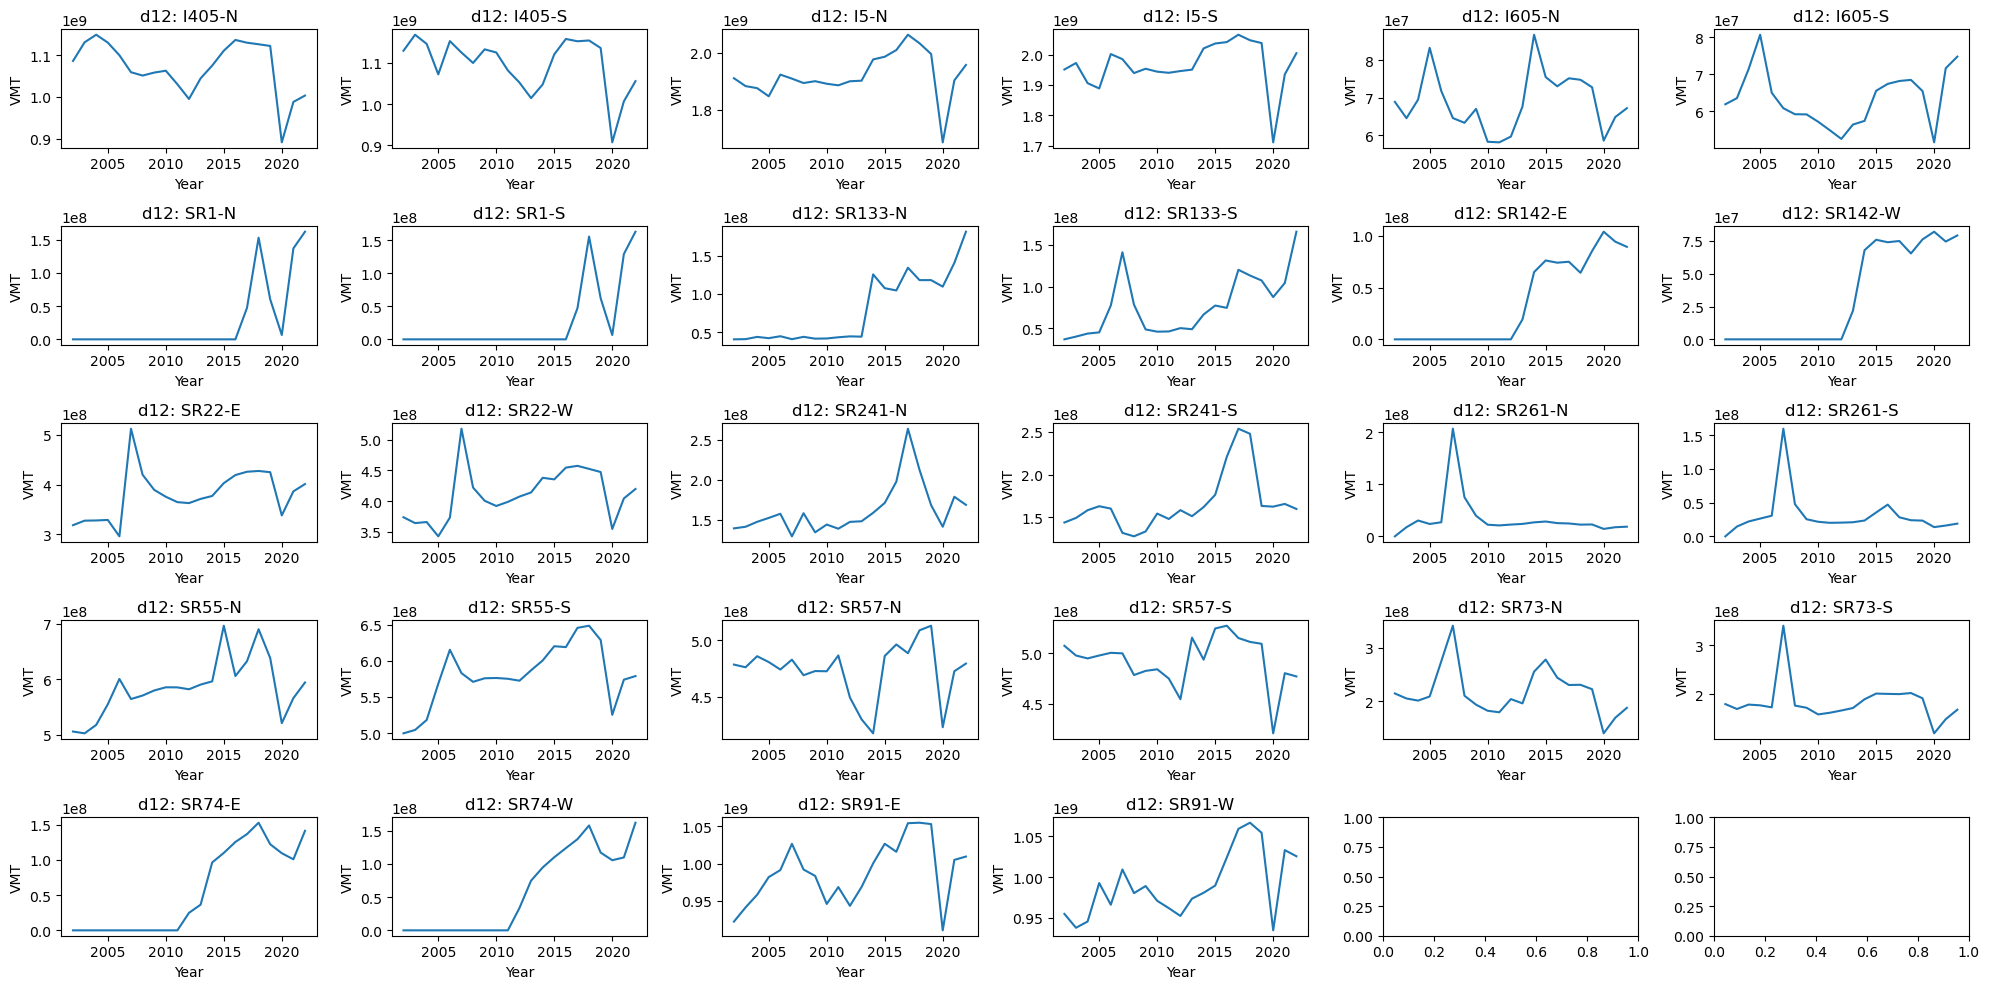

In [47]:
def plot_freeway_vmt(ax, freeway):
    file_names = [f'd12fwy{year}.xlsx' for year in range(2002, 2023)]

    # Initialize a list to store tuples (year, VMT)
    data_list = []

    # Iterate over Excel files and directly extract data
    for file_name in file_names:
        year = int(file_name[-9:-5])
        df = pd.read_excel(file_name)

        # Check if the DataFrame is empty for the given freeway
        if not df[df['Freeway'] == freeway].empty:
            vmt_value = df[df['Freeway'] == freeway]['Vehicle Miles Traveled (VMT)'].iloc[0]
        else:
            vmt_value = 0

        data_list.append((year, vmt_value))

    # Create the result DataFrame directly from the list of tuples
    result_df = pd.DataFrame(data_list, columns=['Year', 'VMT'])

    # Plot the results
    ax.plot(result_df['Year'], result_df['VMT'], label=freeway)
    ax.set_title('d12: ' + freeway)
    ax.set_xlabel('Year')
    ax.set_ylabel('VMT')

# Create subplots for each freeway
fig, axs = plt.subplots(5, 6, figsize=(20, 10))
axs = axs.flatten()

# Iterate over the list of freeways
freeways = ['I405-N', 'I405-S', 'I5-N', 'I5-S', 'I605-N', 'I605-S', 'SR1-N',
            'SR1-S', 'SR133-N', 'SR133-S', 'SR142-E', 'SR142-W', 'SR22-E',
            'SR22-W', 'SR241-N', 'SR241-S', 'SR261-N', 'SR261-S', 'SR55-N',
            'SR55-S', 'SR57-N', 'SR57-S', 'SR73-N', 'SR73-S', 'SR74-E',
            'SR74-W', 'SR91-E', 'SR91-W']

for i, freeway in enumerate(freeways):
    plot_freeway_vmt(axs[i], freeway)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
